# Support Vector Machines :

***Problem Statement :***
- Classify the Size_Categorie using SVM.
  
***Data Description :***
  - month = month of the year: 'jan' to 'dec'
  - day = day of the week: 'mon' to 'sun'
  - FFMC = FFMC index from the FWI system: 18.7 to 96.20
  - DMC = DMC index from the FWI system: 1.1 to 291.3
  - DC = DC index from the FWI system: 7.9 to 860.6
  - ISI = ISI index from the FWI system: 0.0 to 56.10
  - temp = temperature in Celsius degrees: 2.2 to 33.30
  - RH = relative humidity in %: 15.0 to 100
  - wind = wind speed in km/h: 0.40 to 9.40
  - rain = outside rain in mm/m2 : 0.0 to 6.4
  - Size_Categorie = the burned area of the forest ( Small , Large)

In [1]:
# Importing usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

# Ignore anoying warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the given dataset
df = pd.read_csv("forestfires.csv")

In [3]:
# Showing first 5 rows from given dataset
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


***Exploratory Data Analysis (EDA) :***

In [4]:
# Dimensions of dataset
df.shape

(517, 31)

In [5]:
# All column names
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
# Getting only usefull columns from given dataset
df1 = df[['month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','size_category']]
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [7]:
# Checking additional stats of given dataset
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [8]:
# Looking for null values
df1.isnull().any().any()

False

<AxesSubplot: >

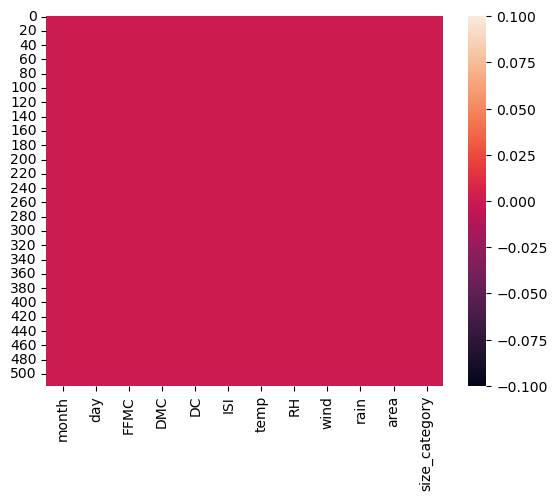

In [10]:
# Checking null values present in given dataset by using heatmap
sns.heatmap(df1.isna())

In [9]:
# More information about given dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [11]:
# In "size_category" column total value counts
df1['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [12]:
# Correlation between each columns
corr=df1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.0000,0.3826,0.3305,0.5318,0.4315,-0.3010,-0.0285,0.0567,0.0401
DMC,0.3826,1.0000,0.6822,0.3051,0.4696,0.0738,-0.1053,0.0748,0.0730
DC,0.3305,0.6822,1.0000,0.2292,0.4962,-0.0392,-0.2035,0.0359,0.0494
ISI,0.5318,0.3051,0.2292,1.0000,0.3943,-0.1325,0.1068,0.0677,0.0083
temp,0.4315,0.4696,0.4962,0.3943,1.0000,-0.5274,-0.2271,0.0695,0.0978
RH,-0.3010,0.0738,-0.0392,-0.1325,-0.5274,1.0000,0.0694,0.0998,-0.0755
wind,-0.0285,-0.1053,-0.2035,0.1068,-0.2271,0.0694,1.0000,0.0611,0.0123
rain,0.0567,0.0748,0.0359,0.0677,0.0695,0.0998,0.0611,1.0000,-0.0074
area,0.0401,0.0730,0.0494,0.0083,0.0978,-0.0755,0.0123,-0.0074,1.0000


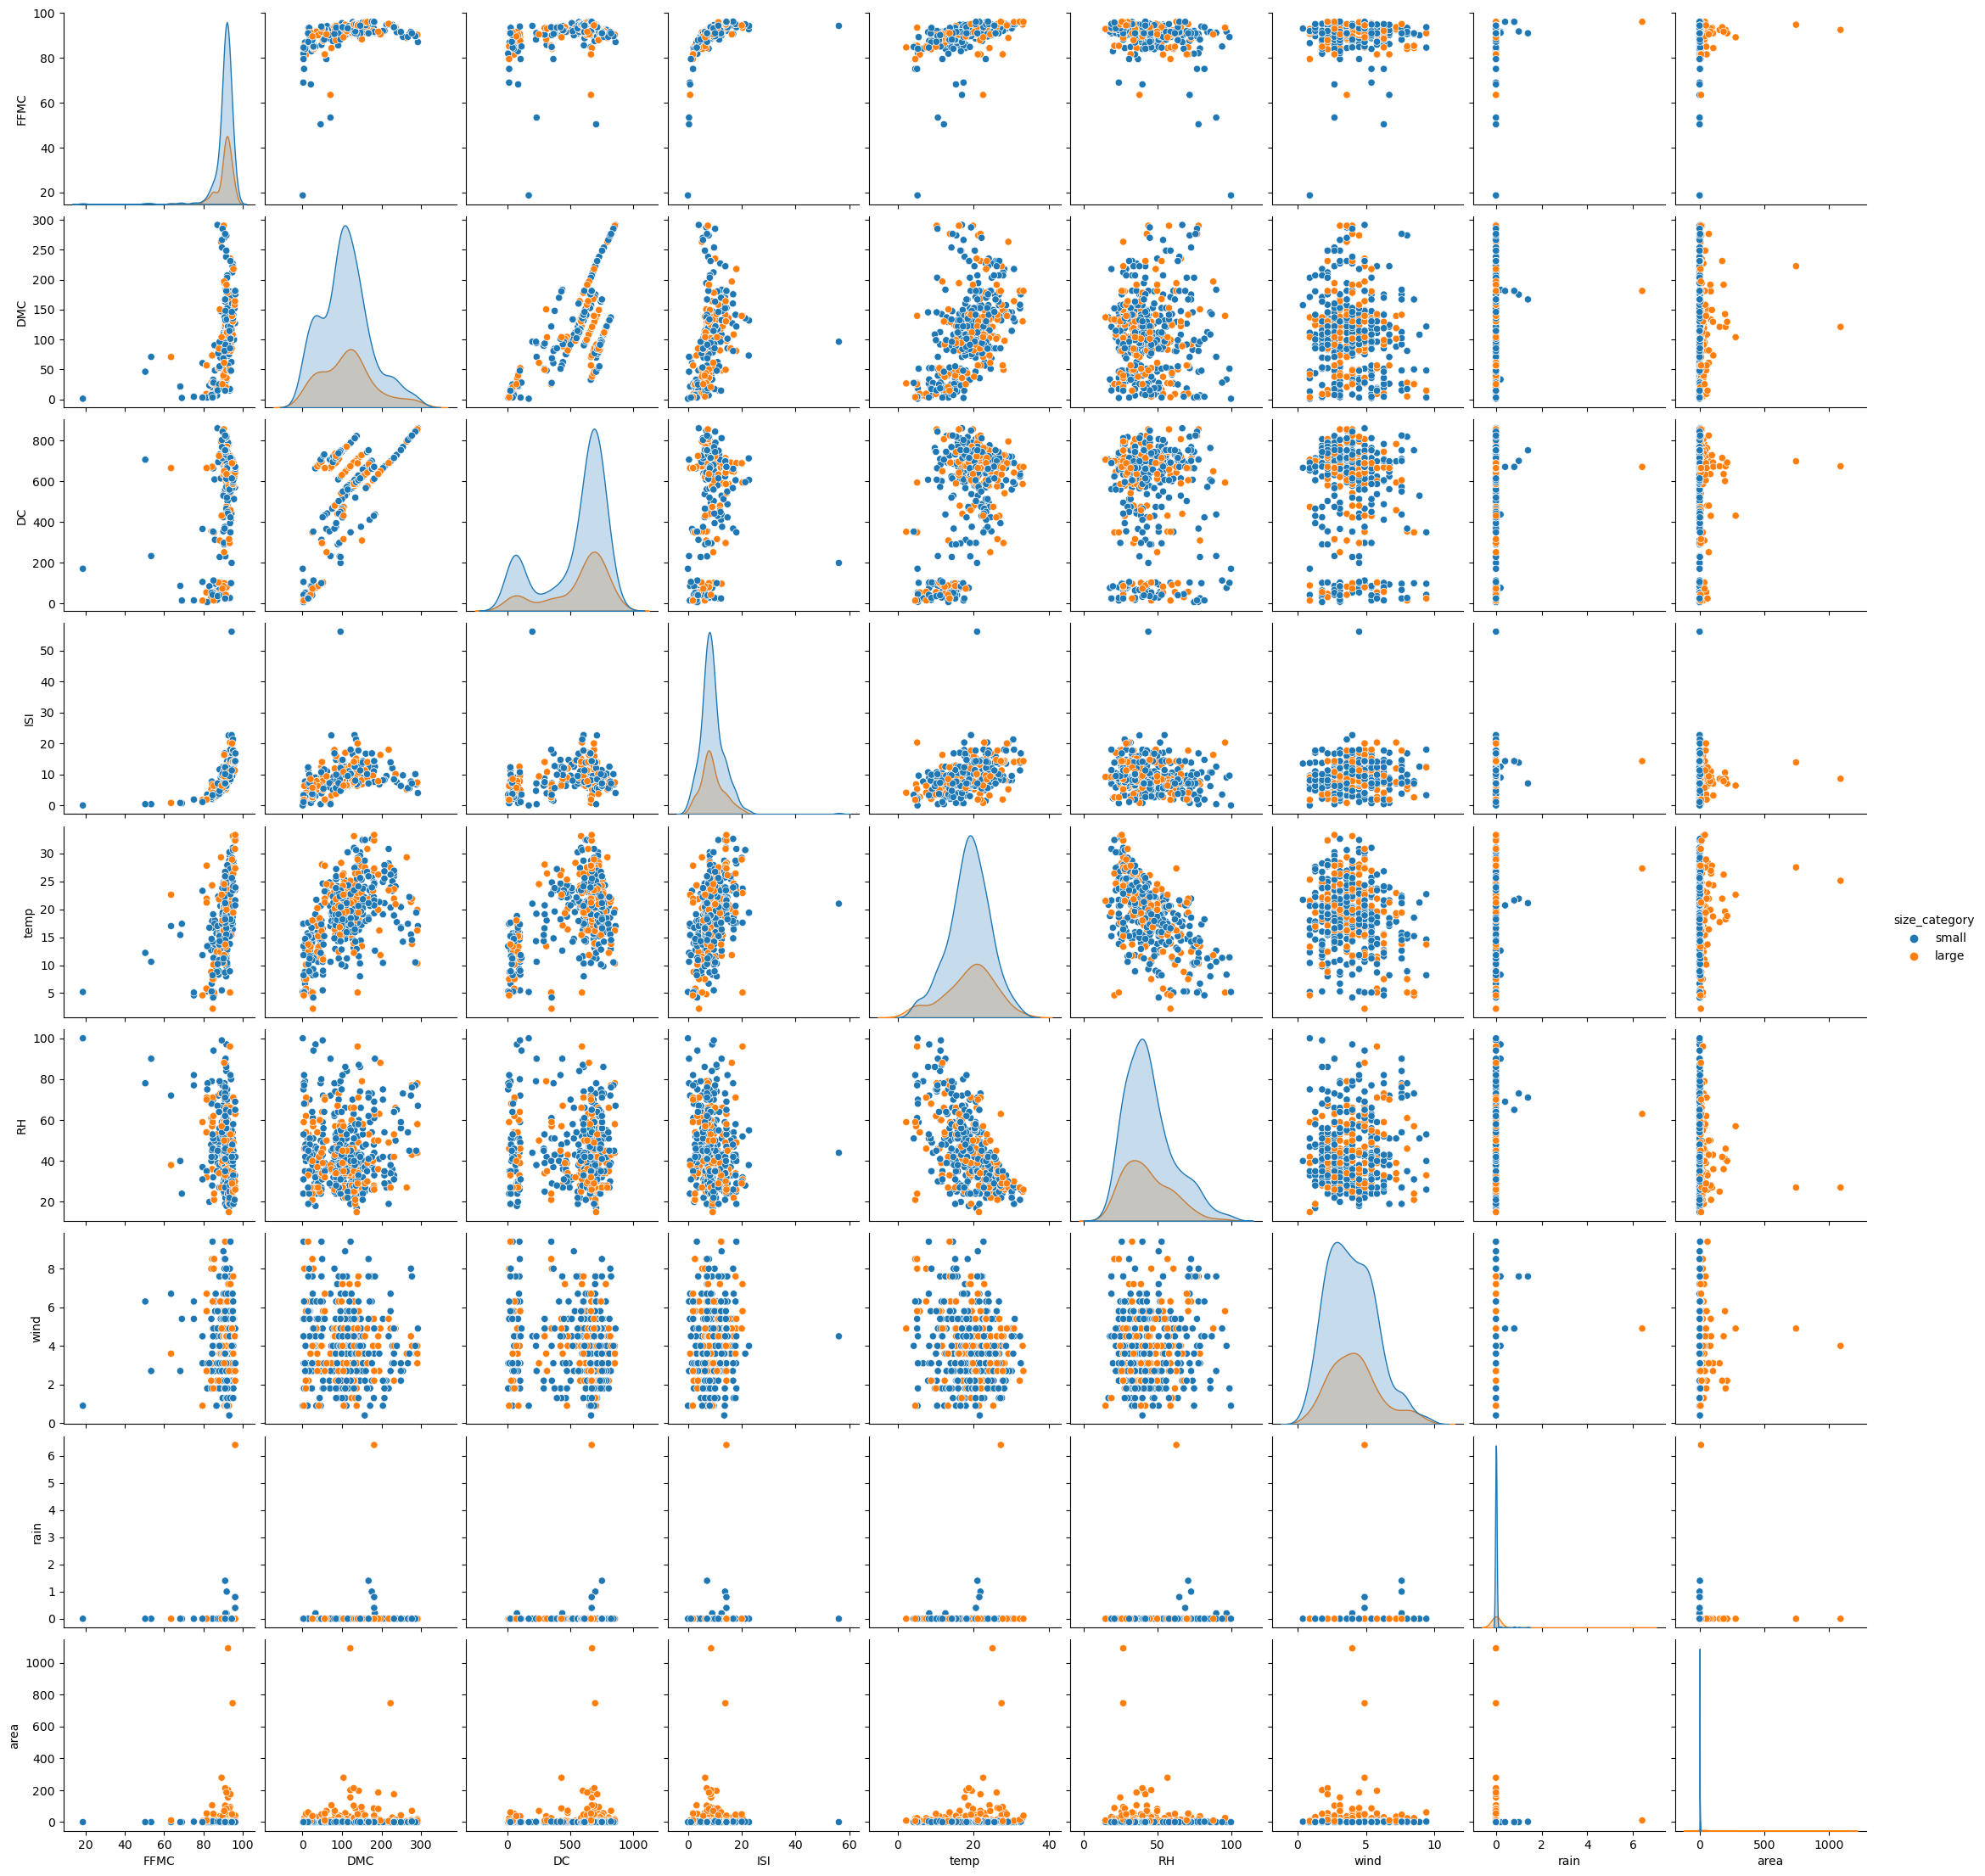

In [13]:
# Ploting pairwise relationships in a dataset.

sns.pairplot(df1, hue="size_category")

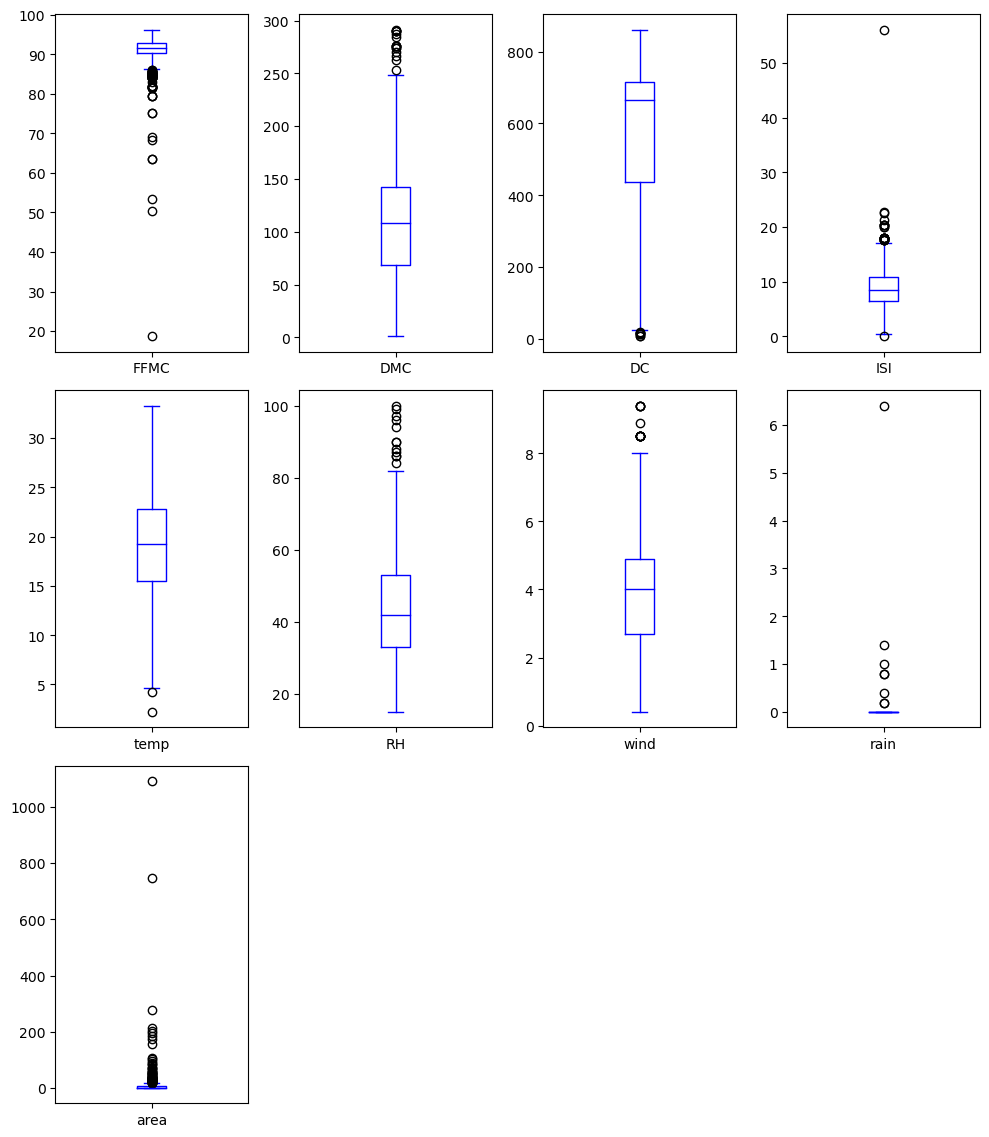

In [14]:
# To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots

df1.plot(kind='box', subplots=True, layout=(4,4),figsize=(10,15), sharex=False, sharey=False, color='blue')
plt.tight_layout()
plt.show()

In [25]:
# Checking skewness of dataset
df1.skew()

FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64

In [26]:
# Kurtosis obtained using Fisher's definition of kurtosis
df1.kurtosis()

FFMC     67.066041
DMC       0.204822
DC       -0.245244
ISI      21.458037
temp      0.136166
RH        0.438183
wind      0.054324
rain    421.295964
area    194.140721
dtype: float64

- **"rain" column is having high skewness and kurtosis values in all dataset.**

***Label Encoding :***

In [31]:
df1['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [33]:
le = LabelEncoder()

# Selecting categorical columns
cat_cols = df1.select_dtypes(include=[object]).columns

# Converting those into numerical columns
df1[cat_cols] = df1[cat_cols].apply(lambda col : le.fit_transform(col))

# After performing label encodingshowing the dataset
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [34]:
df1['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

***Model Building :***

In [35]:
x = df1.iloc[:,:-1] #Independent variable
y = df1['size_category'] #Dependent variable

In [36]:
# Splitting dataset in train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

***Using Radial Basis Fuction (rbf) kernel :***

In [37]:
# Training SVM classifier
rbf_clf = svm.SVC(kernel='rbf')
rbf_clf.fit(xtrain,ytrain)

# Prediction for xtest
ypred = rbf_clf.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
# Confusion matrix to evaluate the accuracy of a classification.
confusion_matrix(ytest,ypred)

array([[ 1, 27],
       [ 0, 76]], dtype=int64)

In [44]:
print("Train SVC Score :", rbf_clf.score(xtrain,ytrain))
print("Test SVC Score :", rbf_clf.score(xtest,ytest))

Train SVC Score : 0.7651331719128329
Test SVC Score : 0.7403846153846154


In [45]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07        28
           1       0.74      1.00      0.85        76

    accuracy                           0.74       104
   macro avg       0.87      0.52      0.46       104
weighted avg       0.81      0.74      0.64       104



In [46]:
print('Model Accuracy :',accuracy_score(ytest,ypred))

Model Accuracy : 0.7403846153846154


***Using Polynominal (poly) kernel :***

In [47]:
# Training SVM classifier
poly_clf = svm.SVC(kernel='poly')
poly_clf.fit(xtrain,ytrain)

# Prediction for xtest
ypred = poly_clf.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [48]:
# Confusion matrix to evaluate the accuracy of a classification.
confusion_matrix(ytest,ypred)

array([[ 4, 24],
       [ 0, 76]], dtype=int64)

In [49]:
print("Train SVC Score :", poly_clf.score(xtrain,ytrain))
print("Test SVC Score :", poly_clf.score(xtest,ytest))

Train SVC Score : 0.7966101694915254
Test SVC Score : 0.7692307692307693


In [50]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25        28
           1       0.76      1.00      0.86        76

    accuracy                           0.77       104
   macro avg       0.88      0.57      0.56       104
weighted avg       0.82      0.77      0.70       104



In [51]:
print('Model Accuracy :',accuracy_score(ytest,ypred))

Model Accuracy : 0.7692307692307693


***Using Linear Kernel :***

In [52]:
# Training SVM classifier
linear_clf = svm.SVC(kernel='linear')
linear_clf.fit(xtrain,ytrain)

# Prediction for xtest
ypred = linear_clf.predict(xtest)
ypred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [53]:
# Confusion matrix to evaluate the accuracy of a classification.
confusion_matrix(ytest,ypred)

array([[28,  0],
       [ 0, 76]], dtype=int64)

In [54]:
print("Train SVC Score :", linear_clf.score(xtrain,ytrain))
print("Test SVC Score :", linear_clf.score(xtest,ytest))

Train SVC Score : 1.0
Test SVC Score : 1.0


In [55]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        76

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [56]:
print('Model Accuracy :',accuracy_score(ytest,ypred))

Model Accuracy : 1.0


***Using Sigmoid kernel :***

In [57]:
# Training SVM classifier
sigmoid_clf = svm.SVC(kernel='sigmoid')
sigmoid_clf.fit(xtrain,ytrain)

# Prediction for xtest
ypred = sigmoid_clf.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
# Confusion matrix to evaluate the accuracy of a classification.
confusion_matrix(ytest,ypred)

array([[ 1, 27],
       [ 4, 72]], dtype=int64)

In [59]:
print("Train SVC Score :", sigmoid_clf.score(xtrain,ytrain))
print("Test SVC Score :", sigmoid_clf.score(xtest,ytest))

Train SVC Score : 0.7312348668280871
Test SVC Score : 0.7019230769230769


In [60]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.20      0.04      0.06        28
           1       0.73      0.95      0.82        76

    accuracy                           0.70       104
   macro avg       0.46      0.49      0.44       104
weighted avg       0.59      0.70      0.62       104



In [61]:
print('Model Accuracy :',accuracy_score(ytest,ypred))

Model Accuracy : 0.7019230769230769


# Conclusion :
- Using Radial Basis Function (rbf) kernel model accuracy is 0.7403 (74.03%).
- Using Polynominal (poly) kernel model accuracy is 0.7692 (76.92%).
- Using Linear kernel model accuracy is 1.0 (100%).
- Usin Sigmoid kernel model accuray is 0.7019 (70.19%).


***The best kernel for Support Vector Machines / Classifier is Radial Linear kernel which gives 100% accuracy.***